# Naive Bayes

Aplicando modelo Naive Bayes para determinar os continentes de diversos países baseados em fatos demográficos e econômicos

Dataset obtido no Kaggle (https://www.kaggle.com/fernandol/countries-of-the-world/version/1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('countries_of_the_world.csv')

In [3]:
dados.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


Observações importantes:

1) Os continentes de cada país estão muito detalhados e devem ser simplicados para facilitar a convergência do modelo

2) Os valores estão separados por vírgula devendo ser substituídos por ponto

In [4]:
colunas = dados.columns

In [5]:
colunas = colunas.drop(['Country','Region'])

In [6]:
colunas

Index(['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service'],
      dtype='object')

In [7]:
dados['Pop. Density (per sq. mi.)'] = dados['Pop. Density (per sq. mi.)'].str.replace(",",".").astype(float)
dados['Coastline (coast/area ratio)'] = dados['Coastline (coast/area ratio)'].str.replace(",",".").astype(float)
dados['Net migration'] = dados['Net migration'].str.replace(",",".").astype(float)
dados['Infant mortality (per 1000 births)'] = dados['Infant mortality (per 1000 births)'].str.replace(",",".").astype(float)
dados['Literacy (%)'] = dados['Literacy (%)'].str.replace(",",".").astype(float)
dados['Phones (per 1000)'] = dados['Phones (per 1000)'].str.replace(",",".").astype(float)
dados['Arable (%)'] = dados['Arable (%)'].str.replace(",",".").astype(float)
dados['Crops (%)'] = dados['Crops (%)'].str.replace(",",".").astype(float)
dados['Other (%)'] = dados['Other (%)'].str.replace(",",".").astype(float)
dados['Birthrate'] = dados['Birthrate'].str.replace(",",".").astype(float)
dados['Deathrate'] = dados['Deathrate'].str.replace(",",".").astype(float)
dados['Agriculture'] = dados['Agriculture'].str.replace(",",".").astype(float)
dados['Industry'] = dados['Industry'].str.replace(",",".").astype(float)
dados['Service'] = dados['Service'].str.replace(",",".").astype(float)
dados['Climate'] = dados['Climate'].str.replace(",",".").astype(float)

In [8]:
dados.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


Determinando os nomes de todos os continentes presentes na amostra

In [9]:
dados['Region'].unique()

array(['ASIA (EX. NEAR EAST)         ',
       'EASTERN EUROPE                     ',
       'NORTHERN AFRICA                    ',
       'OCEANIA                            ',
       'WESTERN EUROPE                     ',
       'SUB-SAHARAN AFRICA                 ', 'LATIN AMER. & CARIB    ',
       'C.W. OF IND. STATES ', 'NEAR EAST                          ',
       'NORTHERN AMERICA                   ',
       'BALTICS                            '], dtype=object)

In [10]:
dados = dados.replace({'Region':{'ASIA (EX. NEAR EAST)         ': 'Asia',
                                   'C.W. OF IND. STATES': 'Asia',
                                   'C.W. OF IND. STATES ': 'Asia',
                                   'ASIA (EX. NEAR EAST)         ': 'Asia',
                                   'NEAR EAST                          ': 'Asia',
                                   'EASTERN EUROPE                     ': 'Europe',
                                   'WESTERN EUROPE                     ': 'Europe',
                                   'BALTICS                            ':'Europe',
                                   'LATIN AMER. & CARIB    ': 'S. America',
                                   'NORTHERN AFRICA                    ': 'Africa',
                                   'SUB-SAHARAN AFRICA                 ': 'Africa',
                                   'OCEANIA                            ': 'Oceania',
                                   'NORTHERN AMERICA                   ': 'N. America'
                                   
    
}})

In [11]:
dados.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,Asia,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,Europe,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,Africa,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,Oceania,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,Europe,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


Determinando a quantidade de NaNs

In [12]:
dados.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

Observamos que existem valores do tipo NaN na amostra e os mesmos serão removidos

In [13]:
dados = dados.dropna()

Nesta amostra existem várias características para cada país. Demos nos perguntar se todas as variáveis são necessárias para o modelo

Normalizando os dados

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
normalizador = MinMaxScaler(feature_range=(0,1)) 

In [16]:
for col in colunas:
    dados[col] = normalizador.fit_transform(dados[col].values.reshape(-1, 1))

In [17]:
dados.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,Asia,0.023626,0.067225,0.002855,0.000000,1.000000,1.000000,0.005362,0.223301,0.003342,0.195299,0.004493,0.814759,0.000000,0.904926,0.656056,0.494148,0.237986,0.356502
1,Albania,Europe,0.002716,0.002982,0.007589,0.001447,0.364586,0.119604,0.107239,0.836165,0.079082,0.339559,0.090278,0.617369,0.666667,0.180018,0.102817,0.301691,0.178490,0.579596
2,Algeria,Africa,0.025051,0.247286,0.000742,0.000046,0.467650,0.178567,0.147453,0.635922,0.086768,0.051844,0.005106,0.947953,0.000000,0.226750,0.080498,0.131339,0.649886,0.264574
6,Anguilla,S. America,0.000000,0.000008,0.008053,0.068684,0.720772,0.116557,0.217158,0.939320,0.512141,0.000000,0.000000,1.000000,0.333333,0.158379,0.107208,0.052016,0.169336,0.804933
7,Antigua & Barbuda,S. America,0.000042,0.000043,0.009530,0.039671,0.336890,0.106792,0.281501,0.866505,0.612274,0.292706,0.092933,0.659067,0.333333,0.221915,0.108306,0.049415,0.215103,0.763453


Convertendo a variável categórica Region para numérica

In [18]:
from sklearn.preprocessing import LabelEncoder, label_binarize

In [19]:
enconder = LabelEncoder()

In [20]:
dados['Region'] = enconder.fit_transform(dados['Region'])

In [21]:
lista_region = dados['Region'].unique()

In [22]:
n_classes = len(lista_region)

In [23]:
dados.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,1,0.023626,0.067225,0.002855,0.000000,1.000000,1.000000,0.005362,0.223301,0.003342,0.195299,0.004493,0.814759,0.000000,0.904926,0.656056,0.494148,0.237986,0.356502
1,Albania,2,0.002716,0.002982,0.007589,0.001447,0.364586,0.119604,0.107239,0.836165,0.079082,0.339559,0.090278,0.617369,0.666667,0.180018,0.102817,0.301691,0.178490,0.579596
2,Algeria,0,0.025051,0.247286,0.000742,0.000046,0.467650,0.178567,0.147453,0.635922,0.086768,0.051844,0.005106,0.947953,0.000000,0.226750,0.080498,0.131339,0.649886,0.264574
6,Anguilla,5,0.000000,0.000008,0.008053,0.068684,0.720772,0.116557,0.217158,0.939320,0.512141,0.000000,0.000000,1.000000,0.333333,0.158379,0.107208,0.052016,0.169336,0.804933
7,Antigua & Barbuda,5,0.000042,0.000043,0.009530,0.039671,0.336890,0.106792,0.281501,0.866505,0.612274,0.292706,0.092933,0.659067,0.333333,0.221915,0.108306,0.049415,0.215103,0.763453


In [24]:
X = dados.drop(['Country','Region'],axis=1).values
Y = dados['Region'].values

Separando em amostra de treino e teste

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_treino,X_teste,Y_treino,Y_teste=train_test_split(X,Y,test_size=0.25,random_state=0)

Aplicando modelo Naive-Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB,MultinomialNB

Modelo Gaussiano

In [29]:
modelo1 = GaussianNB()

In [30]:
modelo1.fit(X_treino,Y_treino)

GaussianNB()

Realizando previsões na amostra de teste

In [31]:
Y_previsto = modelo1.predict(X_teste)

Gerando matriz de confusão

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
cm1=confusion_matrix(Y_teste,Y_previsto)

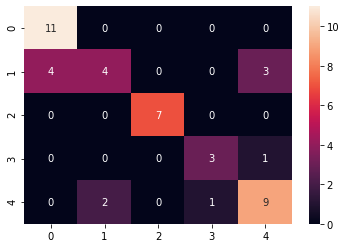

In [34]:
sns.heatmap(cm1,annot=True, fmt="d")

In [35]:
modelo1.score(X_treino,Y_treino)

0.7014925373134329

In [36]:
modelo1.score(X_teste,Y_teste)

0.7555555555555555

Modelo Bernoulli

In [37]:
modelo2 = BernoulliNB()

In [38]:
modelo2.fit(X_treino,Y_treino)

BernoulliNB()

In [39]:
Y_previsto2 = modelo2.predict(X_teste)

In [40]:
cm2=confusion_matrix(Y_teste,Y_previsto2)

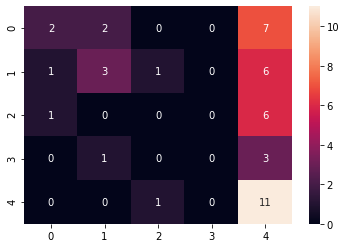

In [41]:
sns.heatmap(cm2,annot=True, fmt="d")

In [42]:
modelo2.score(X_treino,Y_treino)

0.44776119402985076

In [43]:
modelo2.score(X_teste,Y_teste)

0.35555555555555557

Modelo Multinomial

In [44]:
modelo3 = MultinomialNB()

In [45]:
modelo3.fit(X_treino,Y_treino)

MultinomialNB()

In [46]:
Y_previsto3 = modelo3.predict(X_teste)

In [47]:
cm3=confusion_matrix(Y_teste,Y_previsto3)

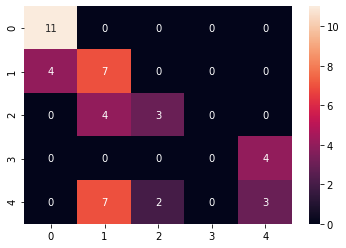

In [48]:
sns.heatmap(cm3,annot=True, fmt="d")

In [49]:
modelo3.score(X_treino,Y_treino)

0.582089552238806

In [50]:
modelo3.score(X_teste,Y_teste)

0.5333333333333333

Métricas de classificação para modelo Gaussiano

In [51]:
from sklearn.metrics import classification_report,f1_score,precision_score,average_precision_score,recall_score,accuracy_score

Relatório de classificação

In [52]:
cr = classification_report(Y_teste,Y_previsto,labels=lista_region)
print(cr)

              precision    recall  f1-score   support

           1       0.67      0.36      0.47        11
           2       1.00      1.00      1.00         7
           0       0.73      1.00      0.85        11
           5       0.69      0.75      0.72        12
           4       0.75      0.75      0.75         4
           3       0.00      0.00      0.00         0

   micro avg       0.76      0.76      0.76        45
   macro avg       0.64      0.64      0.63        45
weighted avg       0.75      0.76      0.74        45



/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1-score

In [53]:
f1 = f1_score(Y_teste,Y_previsto,average='macro')
print("F1 score = {:0.2f}%".format(f1*100))

F1 score = 75.73%


Precision score

In [54]:
precisao = precision_score(Y_teste,Y_previsto,average='macro')
print("Precision score = {:0.2f}%".format(precisao*100))

Precision score = 76.85%


Recall score

In [55]:
rec = recall_score(Y_teste,Y_previsto,average='macro')
print("Recall score = {:0.2f}%".format(rec*100))

Recall score = 77.27%


Accuracy score

In [56]:
acc = accuracy_score(Y_teste,Y_previsto)
print("Accuracy score = {:0.2f}%".format(acc*100))

Accuracy score = 75.56%
